In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import random
from tabulate import tabulate
from matplotlib.dates import WeekdayLocator, DateFormatter

## Read dataset

In [2]:
covidData = pd.read_csv('Case_Information.csv')

covidData.head()
# covidData.info()
# covidData.shape

# print(covidData.columns)

,case_id,age,age_group,sex,date_announced,date_recovered,date_of_death,status,date_announced_as_removed,province,muni_city,health_status,home_quarantined,date_of_onset_of_symptoms,pregnant,region
0,C404174,38.0,35 to 39,Female,2020-01-30,NaN,NaN,Recovered,2020-02-07,Negros Oriental,Dumaguete City,Recovered,NaN,2020-01-21,NaN,Central Visayas (Region VII)
1,C462688,44.0,40 to 44,Male,2020-02-03,NaN,2020-02-01,Died,2020-02-02,Negros Oriental,Dumaguete City,Died,NaN,2020-01-18,NaN,Central Visayas (Region VII)
2,C387710,60.0,60 to 64,Female,2020-02-05,2020-01-31,NaN,Recovered,2020-02-05,Bohol,Panglao,Recovered,No,2020-01-21,NaN,Central Visayas (Region VII)
3,C377460,48.0,45 to 49,Male,2020-03-06,NaN,NaN,Recovered,2020-03-27,Metropolitan Manila,Taguig,Recovered,No,2020-03-03,NaN,Metropolitan Manila
4,C498051,62.0,60 to 64,Male,2020-03-06,NaN,2020-03-11,Died,2020-03-12,Rizal,Cainta,Died,No,2020-02-25,NaN,CALABARZON (Region IV-A)


## Data Cleaning

In [3]:

# duplicate ids have unique values. no need to drop

duplicate_ids = covidData.duplicated(subset='case_id', keep=False)
duplicate_rows = covidData[duplicate_ids]
print(duplicate_rows)

# count all nan values in each columns
covidData.isnull().sum()

       case_id   age age_group   sex date_announced date_recovered  \
11993  C567672  35.0  35 to 39  Male     2020-05-15            NaN   
11994  C567672  41.0  40 to 44  Male     2020-05-15            NaN   

      date_of_death          status date_announced_as_removed  \
11993           NaN  For validation                       NaN   
11994           NaN  For validation                       NaN   

                  province muni_city health_status home_quarantined  \
11993  Metropolitan Manila    Taguig          Mild              NaN   
11994                  NaN       NaN          Mild              NaN   

      date_of_onset_of_symptoms pregnant               region  
11993                2020-04-24      NaN  Metropolitan Manila  
11994                       NaN      NaN                  NaN  


case_id                          0
age                             21
age_group                       21
sex                              0
date_announced                   0
date_recovered               10854
date_of_death                11434
status                           0
date_announced_as_removed     8825
province                      1038
muni_city                     1038
health_status                    0
home_quarantined              6781
date_of_onset_of_symptoms     5530
pregnant                     10166
region                        1038
dtype: int64

## Cases by Gender

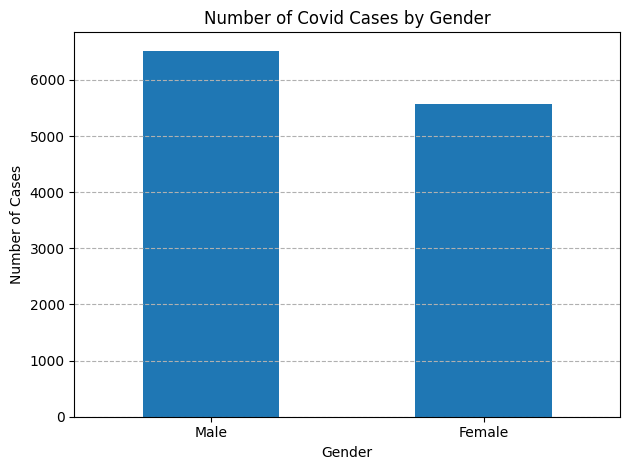

sex
Male      6521
Female    5570
Name: count, dtype: int64


In [4]:
# Count the occurrences of each gender
casesByGender = covidData['sex'].value_counts()

# Create a bar chart
casesByGender.plot.bar()

# Set the labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.title('Number of Covid Cases by Gender')

plt.xticks(rotation='horizontal')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

print(casesByGender)

## Cases by Age Group

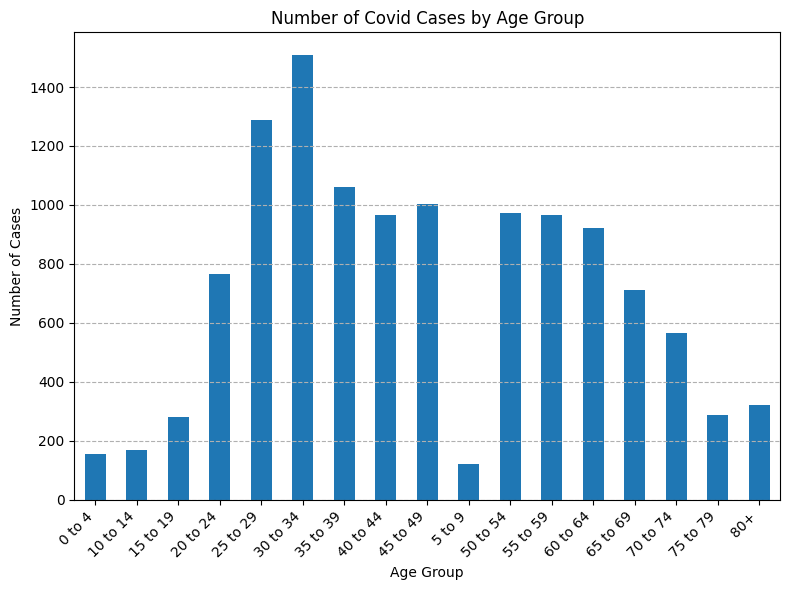

age_group
0 to 4       154
10 to 14     169
15 to 19     282
20 to 24     767
25 to 29    1289
30 to 34    1510
35 to 39    1061
40 to 44     967
45 to 49    1002
5 to 9       122
50 to 54     973
55 to 59     967
60 to 64     921
65 to 69     713
70 to 74     565
75 to 79     287
80+          321
Name: count, dtype: int64


In [5]:

df =  covidData.dropna(subset=['age_group'])

# sort_index sorts age group
casesByAgeGroup = df['age_group'].value_counts().sort_index()

plt.figure(figsize = (8,6))
casesByAgeGroup.plot.bar()

plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.title('Number of Covid Cases by Age Group')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

print(casesByAgeGroup)

## Distribution of Health Status by Age Group

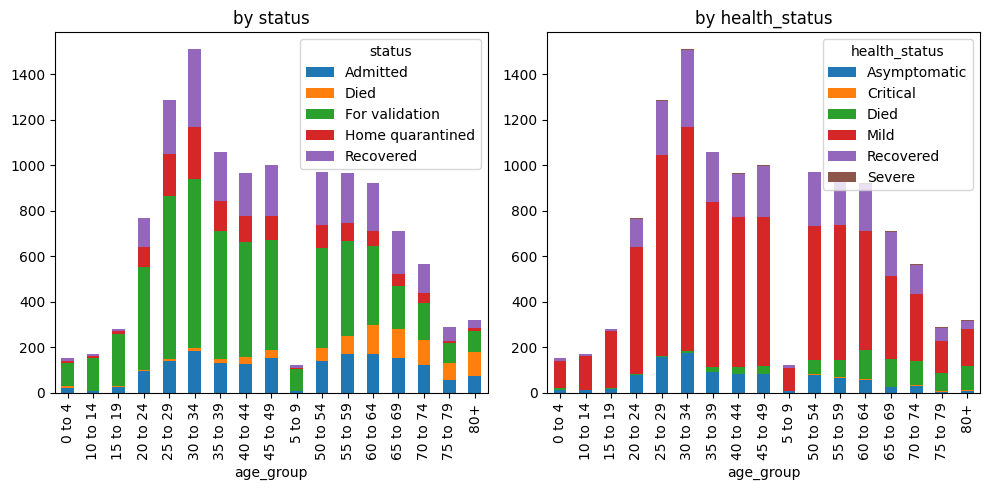

In [6]:
df = covidData.dropna(subset=['age_group'])

# status and health_status have some different properties
age_status = df[['age_group', 'status']]
age_health_status = df[['age_group', 'health_status']]
cross_tab = pd.crosstab(age_status['age_group'], age_status['status'])
cross_tab2 = pd.crosstab(age_health_status['age_group'], age_health_status['health_status'])


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the first bar chart
cross_tab.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('by status')

# Plot the second bar chart
cross_tab2.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('by health_status')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

### Tabular Format

In [7]:
print(tabulate(cross_tab, headers='keys', tablefmt='psql'))

+-------------+------------+--------+------------------+--------------------+-------------+
| age_group   |   Admitted |   Died |   For validation |   Home quarantined |   Recovered |
|-------------+------------+--------+------------------+--------------------+-------------|
| 0 to 4      |         22 |      7 |              100 |                 11 |          14 |
| 10 to 14    |          8 |      1 |              142 |                 11 |           7 |
| 15 to 19    |         25 |      4 |              228 |                 15 |          10 |
| 20 to 24    |         97 |      3 |              451 |                 90 |         126 |
| 25 to 29    |        140 |      6 |              718 |                184 |         241 |
| 30 to 34    |        185 |     11 |              745 |                230 |         339 |
| 35 to 39    |        129 |     20 |              563 |                130 |         219 |
| 40 to 44    |        128 |     30 |              506 |                114 |   

## Cases by Region

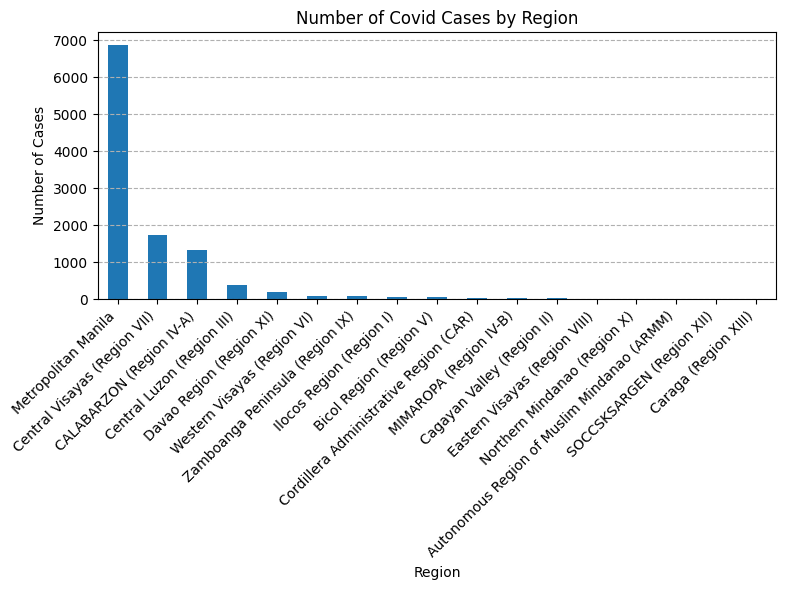

In [8]:

df = covidData.dropna(subset=['region'])

casesByRegion = df['region'].value_counts()

plt.figure(figsize = (8,6))
casesByRegion.plot.bar()

plt.xlabel('Region')
plt.ylabel('Number of Cases')
plt.title('Number of Covid Cases by Region')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

## Cases distribution by date

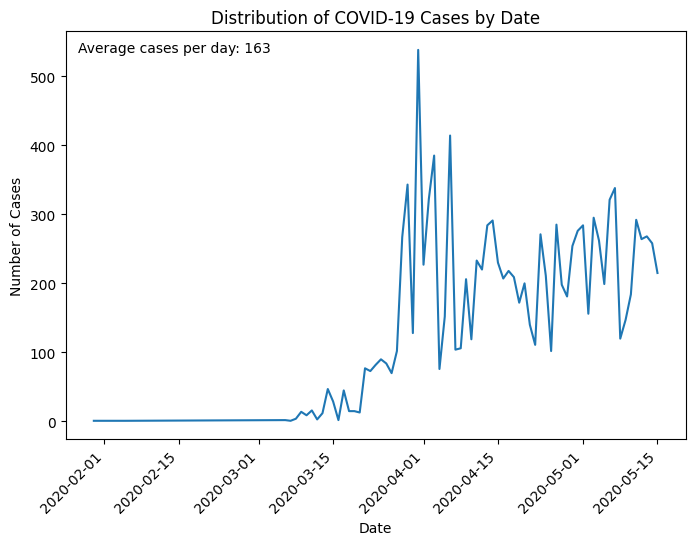

In [25]:
covidData['date_announced'] = pd.to_datetime(covidData['date_announced'])
# covidData.info()

cases_by_date = covidData.groupby('date_announced').size()
mean_cases = cases_by_date.mean()

plt.figure(figsize = (8,6))
cases_by_date.plot()

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Distribution of COVID-19 Cases by Date')
plt.text(0.02, 0.95, f"Average cases per day: {int(mean_cases)}", transform=plt.gca().transAxes, ha='left')

plt.xticks(rotation=45)
plt.show()
# print(cases_by_date)

### Closer inspection on sudden rise and fall

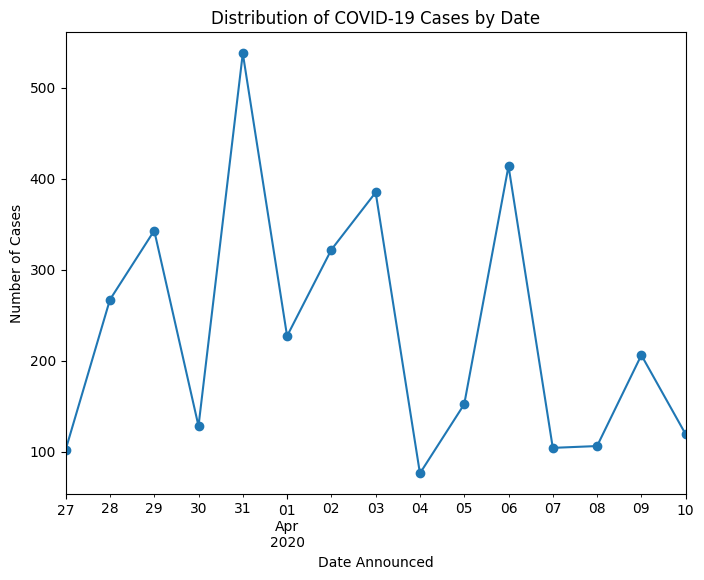

In [78]:
start_date = '2020-03-27'
end_date = '2020-04-10'
filtered_data = covidData.loc[(covidData['date_announced'] >= start_date) 
                              & (covidData['date_announced'] <= end_date)]


cases_by_date_filtered = filtered_data.groupby('date_announced').size()

plt.figure(figsize = (8,6))

# Plot the line chart
cases_by_date_filtered.plot(marker = 'o')

# Set the labels and title
plt.xlabel('Date Announced')
plt.ylabel('Number of Cases')
plt.title('Distribution of COVID-19 Cases by Date')


plt.show()

# filtered_data.head(20)
# filtered_data.info()

## Death rate over time

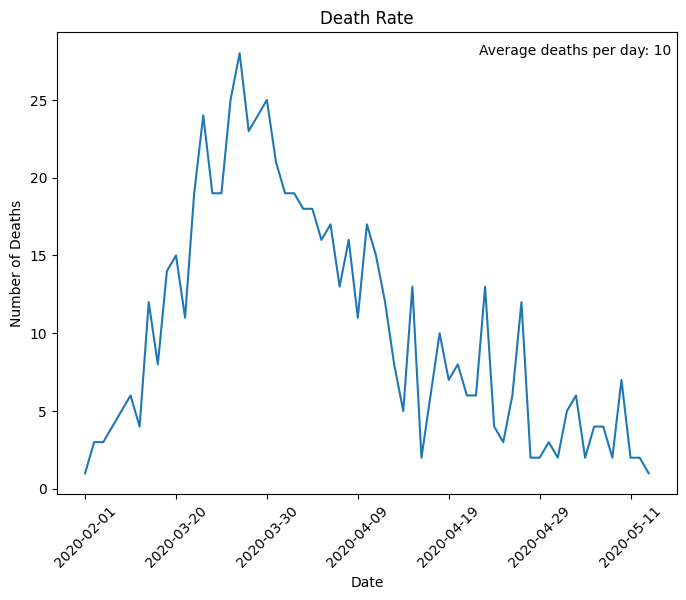

In [44]:
df = covidData.dropna(subset = ['date_of_death'])

death_case = df.groupby('date_of_death').size()
mean_death = death_case.mean()

plt.figure(figsize = (8,6))
death_case.plot()
plt.text(0.68, 0.95, f"Average deaths per day: {int(mean_death)}", 
         transform=plt.gca().transAxes)

plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.title('Death Rate')

plt.xticks(rotation=45)
plt.show()

## Onset of symptoms to confirming case duration

C:\Users\jc\AppData\Local\Temp\ipykernel_7204\1471793293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['symptoms_duration'] = df['date_announced'] - df['date_of_onset_of_symptoms']


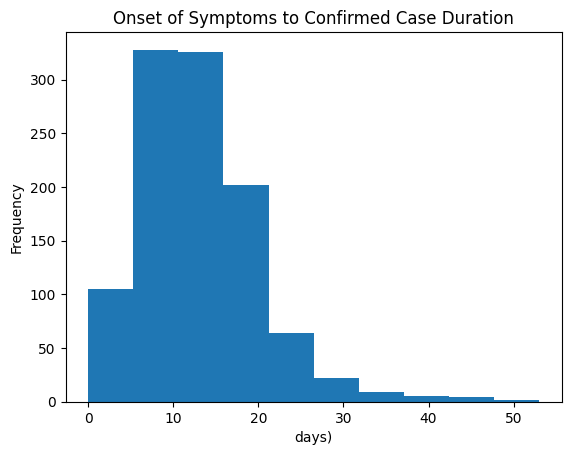

In [85]:
covidData['date_of_onset_of_symptoms'] = pd.to_datetime(covidData['date_of_onset_of_symptoms'])
df = covidData.dropna(subset=['date_recovered'])

df['symptoms_duration'] = df['date_announced'] - df['date_of_onset_of_symptoms']
# remove negative values
df = df[df['symptoms_duration'] >= pd.Timedelta(0)]

# Create a histogram of recovery durations
plt.hist(df['symptoms_duration'].dt.days, bins=10)

# Set the labels and title
plt.xlabel('days)')
plt.ylabel('Frequency')
plt.title('Onset of Symptoms to Confirmed Case Duration')

plt.show()

## Duration of recovery after confirmed case

C:\Users\jc\AppData\Local\Temp\ipykernel_7204\1862801032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recovery_duration'] = df['date_recovered'] - df['date_announced']


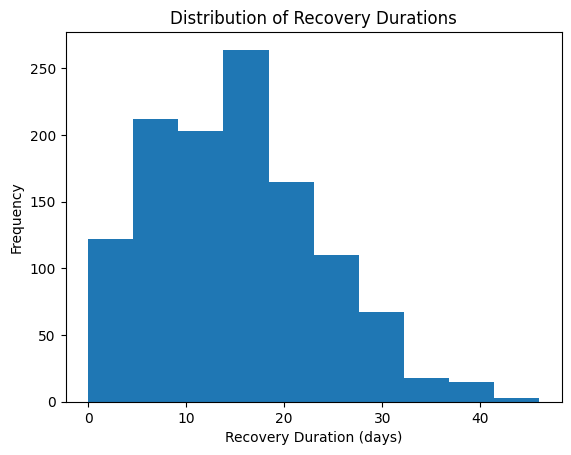

In [26]:

covidData['date_recovered'] = pd.to_datetime(covidData['date_recovered'])
df = covidData.dropna(subset=['date_recovered'])

df['recovery_duration'] = df['date_recovered'] - df['date_announced']
# remove negative values
df = df[df['recovery_duration'] >= pd.Timedelta(0)]

# Create a histogram of recovery durations
plt.hist(df['recovery_duration'].dt.days, bins=10)

# Set the labels and title
plt.xlabel('Recovery Duration (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Recovery Durations')

plt.show()


## Duration before death after confirmed case

C:\Users\jc\AppData\Local\Temp\ipykernel_7204\2376237143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['death_duration'] = df['date_of_death'] - df['date_announced']


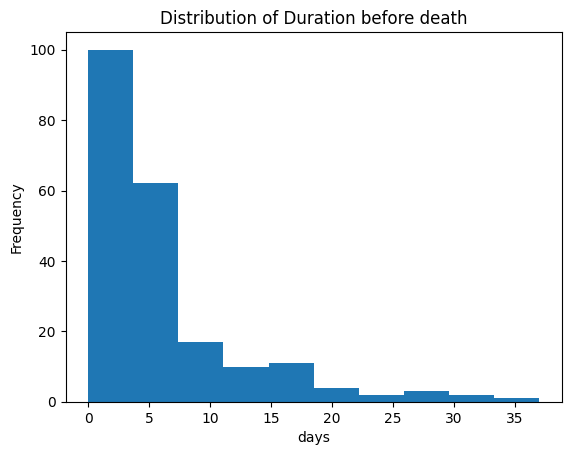

In [86]:
covidData['date_of_death'] = pd.to_datetime(covidData['date_of_death'])
df = covidData.dropna(subset=['date_of_death'])

df['death_duration'] = df['date_of_death'] - df['date_announced']
# remove negative values
df = df[df['death_duration'] >= pd.Timedelta(0)]

# Create a histogram of recovery durations
plt.hist(df['death_duration'].dt.days, bins=10)

# Set the labels and title
plt.xlabel('days')
plt.ylabel('Frequency')
plt.title('Distribution of Duration before death')

plt.show()

## Cases by pregnancy (check if pregnancy has any factor)

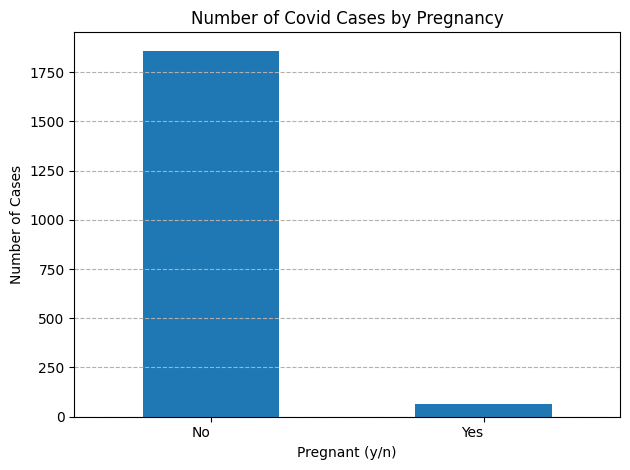

In [103]:

# covidData.info()

df = covidData.dropna(subset = ['pregnant'])

pregnant_cases = df['pregnant'].value_counts()

# Create a bar chart
pregnant_cases.plot.bar()

# Set the labels and title
plt.xlabel('Pregnant (y/n)')
plt.ylabel('Number of Cases')
plt.title('Number of Covid Cases by Pregnancy')

plt.xticks(rotation='horizontal', ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()